<p style="height:100px;line-height:100px;background-color:lime;padding-left:12px;font-size:46px;font-family:serif;font-weight:bold;color:white;">
    Stock Price (GOOG) in Three Years
</p>

# Importing Libraries

In [17]:
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpp
%matplotlib inline
import plotly.graph_objects as go
import yfinance as yf

# Reading and Exploring the Data

In [19]:
goog_ticker = yf.Ticker('goog')

In [20]:
goog = goog_ticker.history(start='2020-01-02', end='2020-12-31', interval='1d')

In [21]:
goog.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,1341.55,1368.14,1341.55,1367.37,1406600,0,0
2020-01-03,1347.86,1372.50,1345.54,1360.66,1186400,0,0
2020-01-06,1350.00,1396.50,1350.00,1394.21,1732300,0,0
2020-01-07,1397.94,1402.99,1390.38,1393.34,1502700,0,0
2020-01-08,1392.08,1411.58,1390.84,1404.32,1528000,0,0


In [22]:
goog.shape

(252, 7)

In [23]:
goog.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.0,252.0
mean,1478.551389,1498.148373,1460.984048,1480.330476,1.895180e+06,0.0,0.0
std,176.404186,174.435405,178.455264,175.486282,7.670688e+05,0.0,0.0
min,1056.510000,1071.320000,1013.540000,1056.620000,3.468000e+05,0.0,0.0
25%,1391.760000,1412.465000,1378.537500,1393.992500,1.396450e+06,0.0,0.0
50%,1471.070000,1488.980000,1459.435000,1475.340000,1.660750e+06,0.0,0.0
75%,1566.130000,1587.162500,1545.297500,1568.182500,2.155150e+06,0.0,0.0
max,1824.520000,1847.200000,1822.650000,1827.990000,4.329100e+06,0.0,0.0


In [24]:
goog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-01-02 to 2020-12-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Volume        252 non-null    int64  
 5   Dividends     252 non-null    int64  
 6   Stock Splits  252 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 15.8 KB


In [25]:
goog.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
dtype: object

In [26]:
goog.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

## Create Simple Moving Average Column

![Moving Average](../Assets/Moving-Average-Formula.jpg)
________________________________________________________________________________________________________________________

![Exponential Moving Average Formula](../Assets/Exponential-Moving-Average-Formula.jpg)

In [27]:
SMA_50 = goog['Close'].rolling(50).mean()
goog['SMA50'] = SMA_50

## Create Transmition Column

### Transmition (Difference) : $ Y_i = X_i - X_{i-1}$

In [28]:
Xi   = goog['Close']
Xi_1 = goog['Close'].shift(-1)
Yi   = Xi - Xi_1
goog['Difference'] = Yi

In [29]:
goog.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA50,Difference
Date,,,,,,,,,
2020-01-02,1341.55,1368.14,1341.55,1367.37,1406600,0,0,NaN,6.71
2020-01-03,1347.86,1372.50,1345.54,1360.66,1186400,0,0,NaN,-33.55
2020-01-06,1350.00,1396.50,1350.00,1394.21,1732300,0,0,NaN,0.87
2020-01-07,1397.94,1402.99,1390.38,1393.34,1502700,0,0,NaN,-10.98
2020-01-08,1392.08,1411.58,1390.84,1404.32,1528000,0,0,NaN,-15.51


# Data Visualization

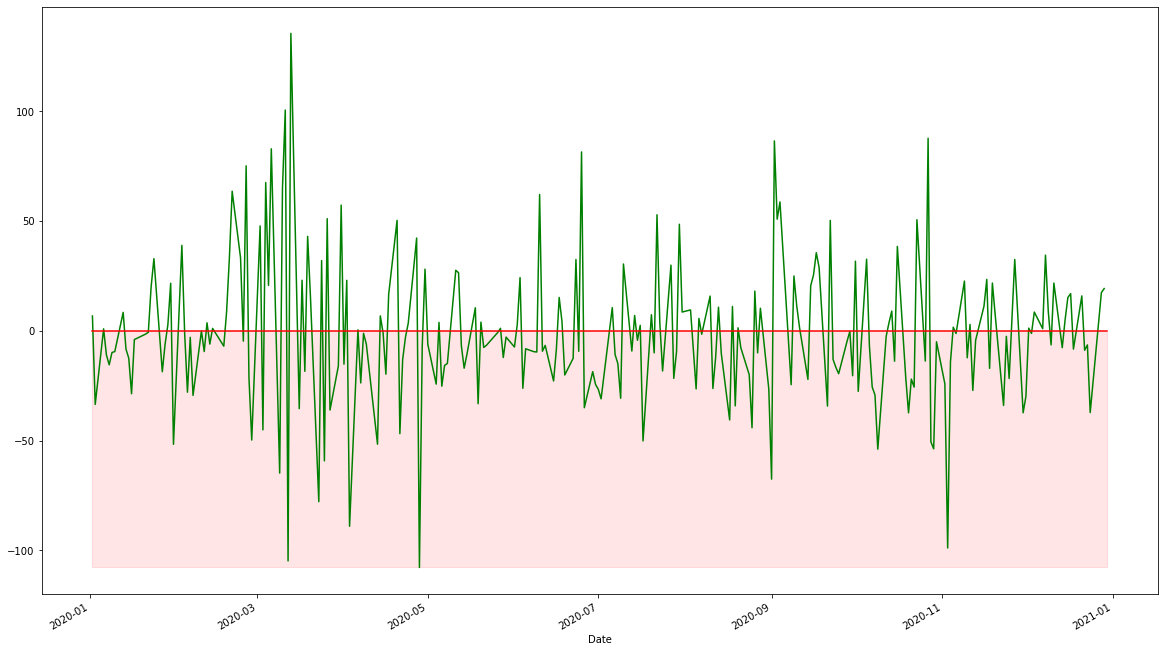

In [30]:
mpp.figure(figsize=(20, 12))

hline_zero = pd.Series(np.zeros(goog.shape[0]), index=goog.index)

goog['Difference'].plot(color='green')
hline_zero.plot(color='red')

mpp.fill_between(x=goog.index, y1=0, y2=goog['Difference'].min(), color='red', alpha=0.1)
mpp.show()

In [37]:
fig = go.Figure(data=[go.Candlestick(x=goog.index,
                                     open=goog['Open'],
                                     high=goog['High'],
                                     low=goog['Low'],
                                     close=goog['Close'])])
fig.show()

<p style="height:240px;line-height:100px;font-size:64px;background-color:cyan;color:white;padding:20px auto;text-align:center;border:2px outset gold;border-radius:8px;">
    Created by:<br/> <code>Tarek Ghajary</code>
</p>